# Load Tensorflow

In [0]:
import tensorflow as tf
#tf.set_random_seed(42)
tf.random.set_seed(55)

# Collect Data

In [0]:
#MNIST Data
(trainX, trainY), (testX,testY)= tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
testX.shape

(10000, 28, 28)

In [5]:
#Number of labels
trainY.shape

(60000,)

In [6]:
testY.shape

(10000,)

In [7]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
trainY[0]

5

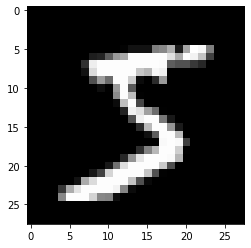

In [9]:
# To print the data
import matplotlib.pyplot as plt
plt.imshow(trainX[0], cmap='gray')

# Convert Output label to multiple values

In [10]:
print(trainY.shape)
print('Samples of trainY :', trainY[0:2])

(60000,)
Samples of trainY : [5 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [0]:
testY=tf.keras.utils.to_categorical(testY,num_classes=10)

In [13]:
print (trainY.shape)
print('Samples of trainY :', trainY[0:2])

(60000, 10)
Samples of trainY : [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Build the NN

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential Model
model = tf.keras.models.Sequential()

#Reshape the data from 2D to 1D -> 28x28 to 784
# The equation accepts samples at vectors. Our current input is matrix
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


#Build DNN

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

#Add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Build the Graph

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

# Train the model

In [18]:
model.fit(trainX,trainY, 
          validataion_data=(testX,testY),
          epochs=5,
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3059 - accuracy: 0.1130
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2957 - accuracy: 0.1168
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2899 - accuracy: 0.1266
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2795 - accuracy: 0.1586
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2557 - accuracy: 0.2329


We are experiencing VG. Loss is reducing very slowly. accuracy is increasing very slowly

In [19]:
model.get_weights()

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99999934, 1.0000007 , 1.0000015 ,
        1.0000001 , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.0000005 , 1.0000001 , 1.0000072 ,
        0.99997574, 1.000023  , 1.0000794 , 0.99997866, 0.99997383,
        0.99991035, 1.0000173 , 1.0000602 , 1.0000192 , 0.99993354,
        0.99998397, 1.0001081 , 0.9999579 , 0.99991155, 0.9999378 ,
        1.0000201 , 0.9999987 , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9999987 , 0.99999905,
        0.999998  , 1.0000131 , 1.0000267 , 0.99992746, 0.99994135,
        0.9997676 , 1.0000888 , 1.0002552 , 0.9999775 , 1.0002208 ,
        1.0009106 , 1.0014606 , 1.0017045 , 1.00

#Save the model

In [0]:
model.save('mnist_dnn_v1.h5')

In [0]:
from google.colab import files
files.download('mnist_dnn_v1.h5')

In [22]:
!ls -l

total 772
-rw-r--r-- 1 root root 782744 Apr 16 05:49 mnist_dnn_v1.h5
drwxr-xr-x 1 root root   4096 Apr  3 16:24 sample_data
